### IMDB Movie Rating Prediction

In [366]:
#importing required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn import preprocessing                                
from sklearn.model_selection import train_test_split             
from sklearn import metrics    

import warnings
warnings.filterwarnings('ignore')

In [367]:
#reading data
df_movies=pd.read_csv("D:/Capstone_project/tmdb_5000_movies.csv")
df_credits=pd.read_csv("D:/Capstone_project/tmdb_5000_credits.csv")

In [368]:
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               

In [558]:
df_movies.columns

Index(['budget', 'genres', 'id', 'keywords', 'original_language', 'popularity',
       'production_companies', 'production_countries', 'release_date',
       'revenue', 'runtime', 'spoken_languages', 'status', 'title',
       'vote_average', 'vote_count'],
      dtype='object')

In [369]:
#Displaying first few rows
df_movies.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [370]:
df_credits.head()

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


### Data preprocessing

In [371]:
#checking for missing values
print('--------Missing Value info of Movie data----------')
print(df_movies.isnull().sum())
print('--------Missing Value info of Credits data----------')
print(df_credits.isnull().sum())

--------Missing Value info of Movie data----------
budget                     0
genres                     0
homepage                3091
id                         0
keywords                   0
original_language          0
original_title             0
overview                   3
popularity                 0
production_companies       0
production_countries       0
release_date               1
revenue                    0
runtime                    2
spoken_languages           0
status                     0
tagline                  844
title                      0
vote_average               0
vote_count                 0
dtype: int64
--------Missing Value info of Credits data----------
movie_id    0
title       0
cast        0
crew        0
dtype: int64


Analysis:

    The movie dataset has 3091 entries  missing out of total 4800 observations. Also, 
    it may not contribute towards the goal of movie rating prediction.
    
    So here, the features himepage and tagline is dropped and will not taken for the further investigation.
    
    
    The credits dataset has no missing values

In [372]:
#dropping columns not relevant
df_movies=df_movies.drop(['homepage','tagline','overview','original_title'],axis=1)


In [373]:
#missing value treatment on runtime
df_movies.runtime.fillna(df_movies.runtime.mean(),inplace=True)

In [374]:
# Removing the movies that has no release date
df_movies.loc[df_movies.release_date.isnull()]
#dropping rows with null values
df_movies = df_movies.dropna()

In [375]:
print(df_movies.isnull().sum())

budget                  0
genres                  0
id                      0
keywords                0
original_language       0
popularity              0
production_companies    0
production_countries    0
release_date            0
revenue                 0
runtime                 0
spoken_languages        0
status                  0
title                   0
vote_average            0
vote_count              0
dtype: int64


In [376]:
#merging movies and credits dataframe on the common column 'id'
#The df movies and credits have the IDs but different col_names. So renaming the col in credits column
df_credits.rename(columns = {'movie_id':'id'}, inplace = True)
df_credits=df_credits.drop(['title'],axis=1) #removing title from credits as it is a repetition
movies1=pd.merge(df_movies,df_credits, on='id',how='inner')



In [377]:
movies=movies1
#coverting release date into datetime format
movies['release_date'] =  pd.to_datetime(df_movies['release_date'], format ='%Y-%m-%d')

In [378]:
#checking for rows with zero values on budget,runtime,vote_count,vote_average

In [379]:
movies.apply(lambda x: sum(x==0),axis=0)

budget                  1036
genres                     0
id                         0
keywords                   0
original_language          0
popularity                 0
production_companies       0
production_countries       0
release_date               0
revenue                 1426
runtime                   34
spoken_languages           0
status                     0
title                      0
vote_average              62
vote_count                61
cast                       0
crew                       0
dtype: int64

In [380]:
#Here, vote_average which is the ratings has values=0. Ratings cannot be zero. SO, it is considered as missing and 
#can be used as a test dataset
vote_average_index=movies.index[movies['vote_average']==0]
print(vote_average_index)
vote_average_test_df= movies.iloc[movies.index[vote_average_index]]

Int64Index([1464, 3669, 3670, 3852, 3855, 3960, 3967, 4051, 4065, 4068, 4118,
            4140, 4186, 4210, 4266, 4269, 4275, 4293, 4305, 4307, 4309, 4400,
            4444, 4458, 4462, 4486, 4487, 4491, 4500, 4504, 4508, 4550, 4555,
            4558, 4568, 4588, 4610, 4624, 4625, 4632, 4637, 4652, 4656, 4659,
            4664, 4673, 4683, 4691, 4693, 4697, 4698, 4707, 4709, 4713, 4715,
            4720, 4728, 4768, 4770, 4779, 4784, 4793],
           dtype='int64')


In [381]:
vote_average_test_df

,budget,genres,id,keywords,original_language,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,title,vote_average,vote_count,cast,crew
1464,0,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 80, ""name...",310706,[],en,0.126738,"[{""name"": ""Capitol Films"", ""id"": 826}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-05-13,0,100.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Black Water Transit,0.0,0,"[{""cast_id"": 4, ""character"": ""Jack"", ""credit_i...","[{""credit_id"": ""5500016ac3a3685b9900106a"", ""de..."
3669,0,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam...",113406,[],en,0.407030,"[{""name"": ""Phillybrook Films"", ""id"": 65147}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-04-28,0,0.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Should've Been Romeo,0.0,0,"[{""cast_id"": 4, ""character"": ""Joey"", ""credit_i...","[{""credit_id"": ""5617d84d92514166e2001e21"", ""de..."
3670,0,"[{""id"": 10751, ""name"": ""Family""}]",447027,[],en,0.028756,"[{""name"": ""New Kingdom Pictures"", ""id"": 41671}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2015-10-27,0,88.0,[],Released,Running Forever,0.0,0,[],[]
3852,0,"[{""id"": 18, ""name"": ""Drama""}]",395766,"[{""id"": 11162, ""name"": ""miniseries""}]",en,0.042346,[],[],2016-04-29,0,200.0,[],Released,The Secret,0.0,0,"[{""cast_id"": 0, ""character"": """", ""credit_id"": ...","[{""credit_id"": ""586756379251413e4c006618"", ""de..."
3855,3500000,"[{""id"": 99, ""name"": ""Documentary""}]",370662,"[{""id"": 2210, ""name"": ""climate change""}, {""id""...",en,1.618138,"[{""name"": ""Representational Pictures"", ""id"": 8...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2015-09-04,0,100.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Time to Choose,0.0,0,"[{""cast_id"": 0, ""character"": ""Narrator"", ""cred...","[{""credit_id"": ""565d1089c3a368758d001059"", ""de..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4768,0,"[{""id"": 28, ""name"": ""Action""}, {""id"": 37, ""nam...",69382,[],en,0.003582,[],[],2009-04-22,0,78.0,[],Released,The Legend of God's Gun,0.0,0,"[{""cast_id"": 1001, ""character"": ""The Gunslinge...","[{""credit_id"": ""52fe47c5c3a368484e0d89cf"", ""de..."
4770,0,"[{""id"": 27, ""name"": ""Horror""}]",220490,[],en,0.056459,[],[],2005-03-01,0,89.0,[],Released,Her Cry: La Llorona Investigation,0.0,0,"[{""cast_id"": 1, ""character"": ""Tina"", ""credit_i...","[{""credit_id"": ""52fe4dab9251416c7513cb8f"", ""de..."
4779,0,"[{""id"": 53, ""name"": ""Thriller""}, {""id"": 80, ""n...",366967,[],en,0.038143,[],[],1990-07-27,0,90.0,[],Released,Dutch Kills,0.0,0,"[{""cast_id"": 4, ""character"": ""Val"", ""credit_id...","[{""credit_id"": ""563d13ec9251414c70007d5e"", ""de..."
4784,0,"[{""id"": 18, ""name"": ""Drama""}]",287625,[],en,0.327794,[],"[{""iso_3166_1"": ""KE"", ""name"": ""Kenya""}]",2005-01-17,0,60.0,"[{""iso_639_1"": ""sw"", ""name"": ""Kiswahili""}, {""i...",Released,Stories of Our Lives,0.0,0,"[{""cast_id"": 8, ""character"": """", ""credit_id"": ...","[{""credit_id"": ""549e790a9251414d27003096"", ""de..."


In [382]:
#dropping rows with vote_average=0 from the original df
movies.drop(movies[ movies['vote_average'] == 0 ].index, inplace = True)
movies.drop(movies[ (movies['budget'] == 0) & (movies['revenue']==0) ].index, inplace = True)

In [383]:
#filling the buget and revenue with mean values
movies['budget']=movies['budget'].replace(0,movies['budget'].mean())
movies['revenue']=movies['revenue'].replace(0,movies['revenue'].mean())

In [384]:
movies['runtime']=movies['runtime'].replace(0,movies['runtime'].mean())

In [385]:
movies.apply(lambda x: sum(x==0),axis=0)

budget                  0
genres                  0
id                      0
keywords                0
original_language       0
popularity              0
production_companies    0
production_countries    0
release_date            0
revenue                 0
runtime                 0
spoken_languages        0
status                  0
title                   0
vote_average            0
vote_count              0
cast                    0
crew                    0
dtype: int64

In [386]:
movies.shape

(3902, 18)

#converting json objects to python

In [387]:
from pandas.io.json import json_normalize
import json
def extract(data,key):
    result = []
    data = json.loads(data) #convert to json from string
    for item in data: #convert to list from json
        result.append(item[key])
    return result

In [388]:
movies.genres = movies.genres.apply(extract,key='name') # creates a list of genre from json
movies.keywords = movies.keywords.apply(extract,key='name') # creates a list of genre from json
movies.production_companies=movies.production_companies.apply(extract,key='name')
movies.production_countries=movies.production_countries.apply(extract,key='name')
#converting spoken languages into proper encoding
movies.spoken_languages=movies.spoken_languages.str.decode('unicode-escape')
movies.spoken_languages=movies.spoken_languages.apply(extract,key='name')


In [389]:
movies.head(5)

,budget,genres,id,keywords,original_language,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,title,vote_average,vote_count,cast,crew
0,237000000.0,"[Action, Adventure, Fantasy, Science Fiction]",19995,"[culture clash, future, space war, space colon...",en,150.437577,"[Ingenious Film Partners, Twentieth Century Fo...","[United States of America, United Kingdom]",2009-12-10,2.787965e+09,162.0,"[English, Español]",Released,Avatar,7.2,11800,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000.0,"[Adventure, Fantasy, Action]",285,"[ocean, drug abuse, exotic island, east india ...",en,139.082615,"[Walt Disney Pictures, Jerry Bruckheimer Films...",[United States of America],2007-05-19,9.610000e+08,169.0,[English],Released,Pirates of the Caribbean: At World's End,6.9,4500,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,245000000.0,"[Action, Adventure, Crime]",206647,"[spy, based on novel, secret agent, sequel, mi...",en,107.376788,"[Columbia Pictures, Danjaq, B24]","[United Kingdom, United States of America]",2015-10-26,8.806746e+08,148.0,"[Français, English, Español, Italiano, Deutsch]",Released,Spectre,6.3,4466,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,250000000.0,"[Action, Crime, Drama, Thriller]",49026,"[dc comics, crime fighter, terrorist, secret i...",en,112.312950,"[Legendary Pictures, Warner Bros., DC Entertai...",[United States of America],2012-07-16,1.084939e+09,165.0,[English],Released,The Dark Knight Rises,7.6,9106,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,260000000.0,"[Action, Adventure, Science Fiction]",49529,"[based on novel, mars, medallion, space travel...",en,43.926995,[Walt Disney Pictures],[United States of America],2012-03-07,2.841391e+08,132.0,[English],Released,John Carter,6.1,2124,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [390]:
print(movies.vote_average.describe())
print(movies.popularity.describe())

count    3902.000000
mean        6.246617
std         0.912696
min         1.900000
25%         5.700000
50%         6.300000
75%         6.900000
max        10.000000
Name: vote_average, dtype: float64
count    3902.000000
mean       25.503156
std        33.983373
min         0.001586
25%         7.812635
50%        17.109781
75%        32.988833
max       875.581305
Name: popularity, dtype: float64


In [391]:
#Converting vote_average into categorical data by defining the bins

In [392]:
#median/average=6 ,min=0 ,max=10
movies['ratings'] = pd.cut(x=movies['vote_average'], bins=[0, 4, 6.9, 10], labels=['Bad', 'Average', 'Good'])

In [393]:
print(movies[['vote_average','ratings']])

      vote_average  ratings
0              7.2     Good
1              6.9  Average
2              6.3  Average
3              7.6     Good
4              6.1  Average
...            ...      ...
4790           2.0      Bad
4791           7.4     Good
4795           6.9  Average
4797           6.6  Average
4798           5.9  Average

[3902 rows x 2 columns]


### EDA

# 1.Highest rated movie based on Vote_average(rating)

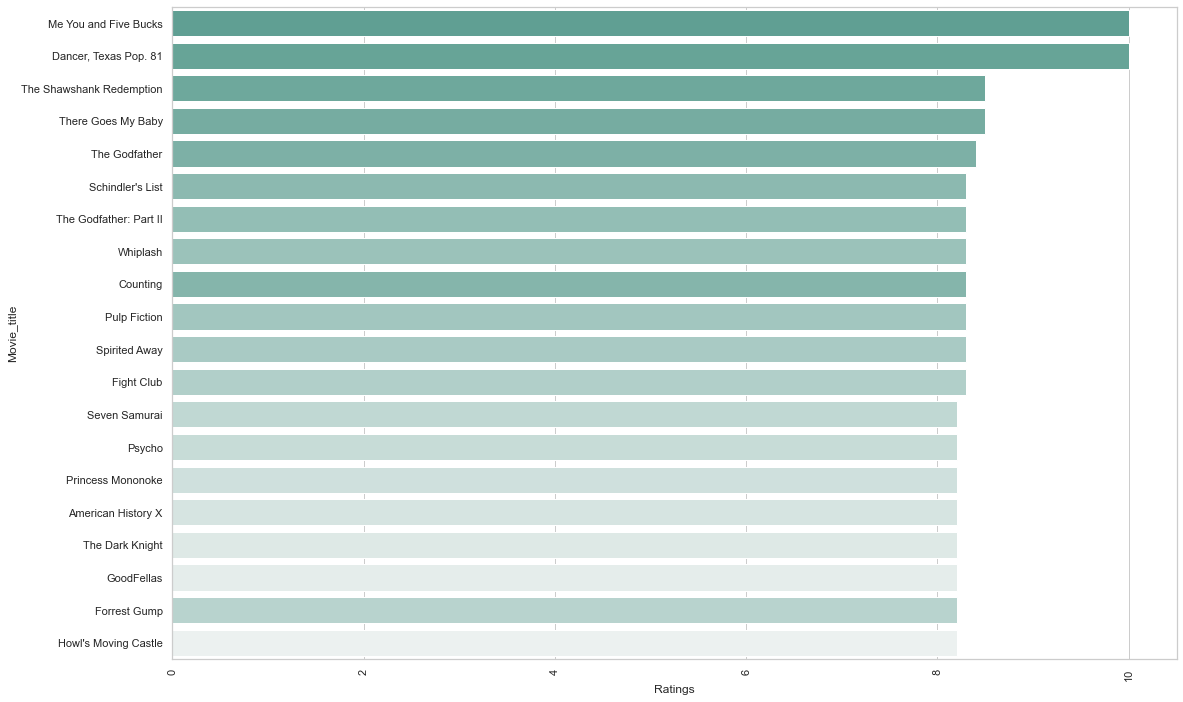

In [394]:
movies_sorted= movies.sort_values(['vote_average'],ascending = False)
x = movies_sorted['title'].head(20)
y = movies_sorted['vote_average'].head(20)

#x = np.array(x)
#y = np.array(y)

plt.figure(figsize= (18,12))
sns.set(style="whitegrid", color_codes=True)
pal = sns.color_palette("light:#5A9", len(y))
rank = y.argsort().argsort() 
sns.barplot(x = y ,y = x,palette=np.array(pal[::1])[rank])
plt.xticks(rotation = 90)
plt.xlabel('Ratings')
plt.ylabel('Movie_title')
plt.show()


### 2. Number of movies produced every year

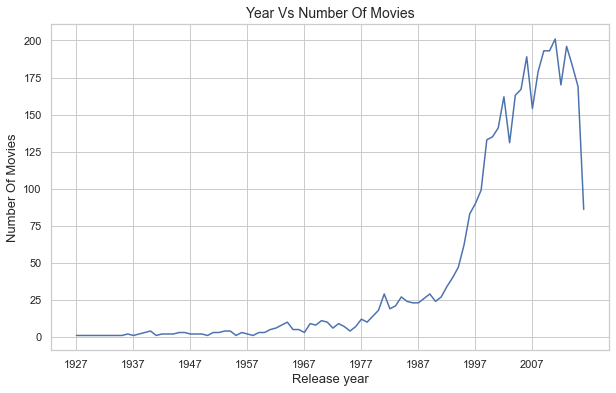

In [395]:
# make group for each year and count the number of movies in each year 
movies['year'] = movies['release_date'].dt.year
a=movies.year.min()
b=movies.year.max()
data=movies.groupby('year').count()['id']
plt.figure(figsize= (10,6))
data.plot(xticks = np.arange(a,b,10))

#set the figure size and labels
#sns.set(rc={'figure.figsize':(4,6)})
plt.title("Year Vs Number Of Movies",fontsize = 14)
plt.xlabel('Release year',fontsize = 13)
plt.ylabel('Number Of Movies',fontsize = 13)
#set the style sheet
sns.set_style("whitegrid")


### 3. finding the movie that made high profit

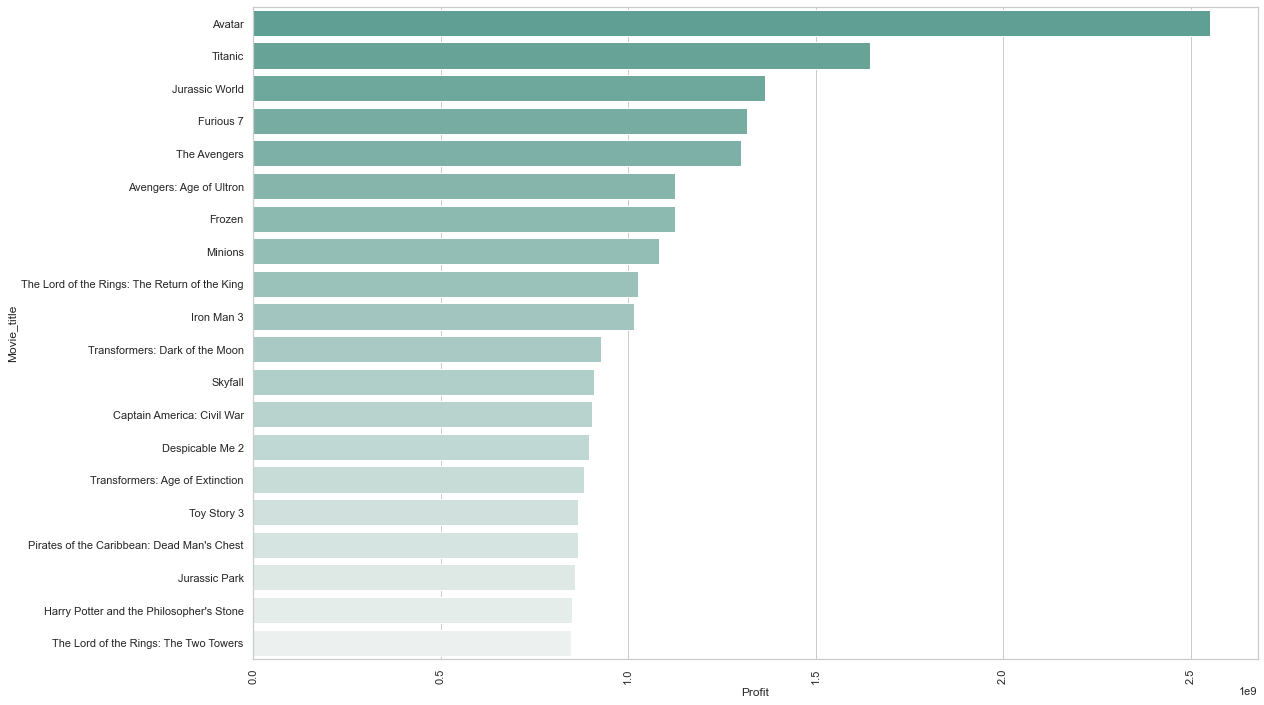

In [396]:
#
movies['Profit'] = movies['revenue'] - movies['budget']
movies_sorted= movies.sort_values(['Profit'],ascending = False)
x = movies_sorted['title'].head(20)
y = movies_sorted['Profit'].head(20)

plt.figure(figsize= (18,12))
sns.set(style="whitegrid", color_codes=True)
pal = sns.color_palette("light:#5A9", len(y))
rank = y.argsort().argsort() 
sns.barplot(x = y ,y = x,palette=np.array(pal[::1])[rank])
plt.xticks(rotation = 90)
plt.xlabel('Profit')
plt.ylabel('Movie_title')
plt.show()


In [397]:
#Finding the movies with highest and lowest profit
high=movies.Profit.idxmax()
low=movies.Profit.idxmin()  
    #print the movie with high and low profit
print("Movie Which Has Highest "+ " : ",movies['title'][high])
print("Movie Which Has Lowest "+ "  : ",movies['title'][low])

Movie Which Has Highest  :  Avatar
Movie Which Has Lowest   :  The Lone Ranger


### 4.Comparing budget , rating and profit of the movies 

<AxesSubplot:ylabel='Movies'>

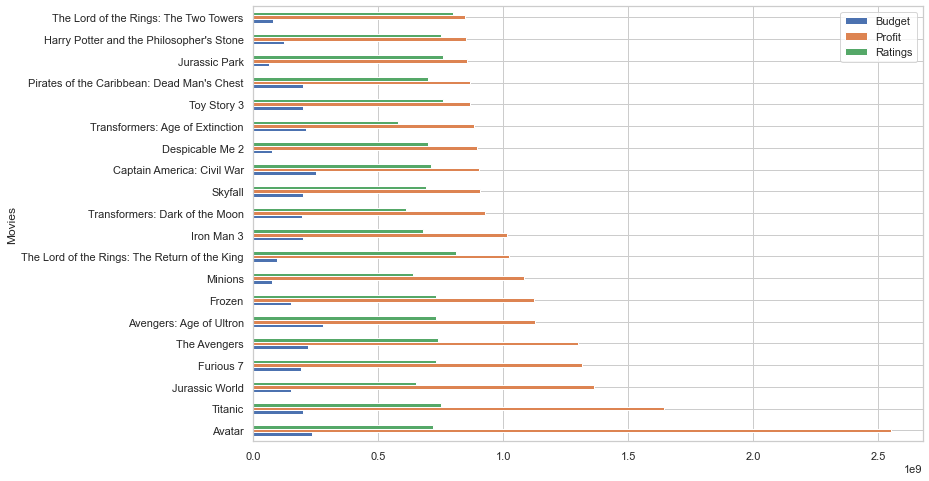

In [398]:
movies_sorted= movies.sort_values(['Profit'],ascending = False)
index= movies_sorted['title'].head(20).tolist()
x= movies_sorted['budget'].head(20).tolist()
y=(movies_sorted['vote_average']*pow(10,8)).head(20).tolist()
z= movies_sorted['Profit'].head(20).tolist()

# creating dataframe
df = pd.DataFrame({
    'Movies': index,
    'Budget': x,
    'Ratings': y,
    'Profit':z
})
  
# plotting graph
#df.plot(figsize=(20, 10))
df.plot(x="Movies", y=["Budget","Profit",'Ratings'], kind="barh", figsize=(12, 8))

In [399]:
#Find budget revenue ratio and plot

# 5. Most popular movie

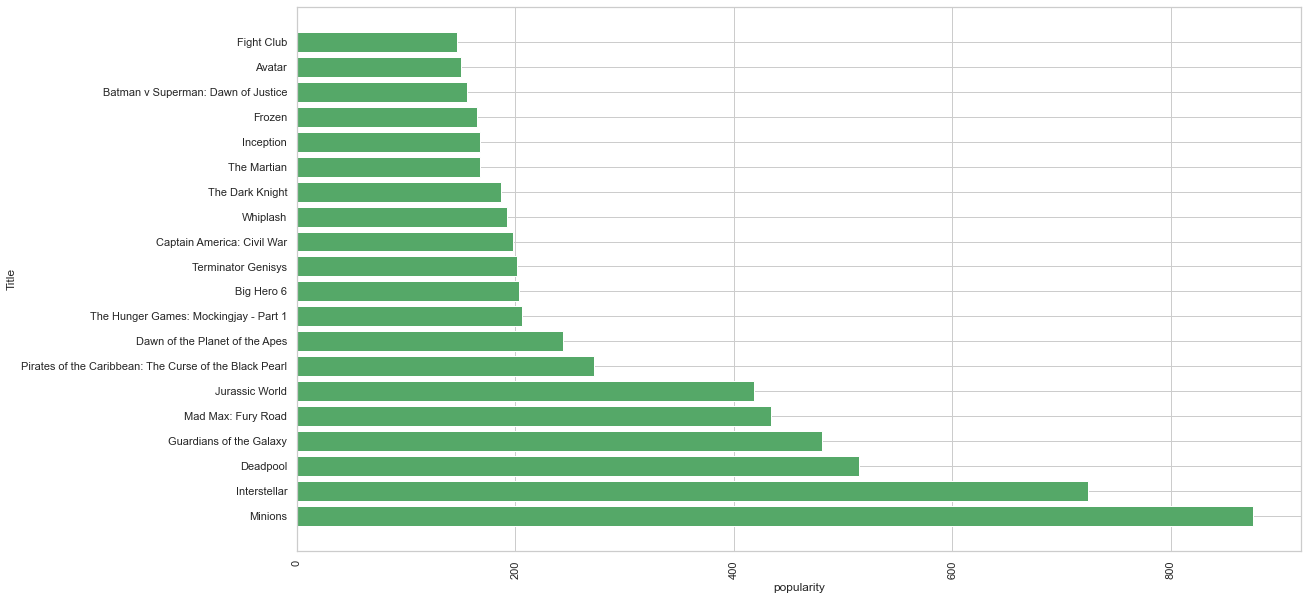

In [400]:
#popular movie
movies_sorted= movies.sort_values(['popularity'],ascending = False)
x = movies_sorted['title'].head(20)
y1 = movies_sorted['popularity'].head(20)
plt.figure(figsize= (18,10))
plt.barh(x, y1, color='g')
plt.xticks(rotation = 90)
plt.ylabel('Title')
plt.xlabel('popularity')
plt.show()

In [401]:
#!pip install openpyxl
#movies.to_excel("processed.xlsx")
#movies.to_csv('processed.csv')

### 6. What kind of genre is the most common?

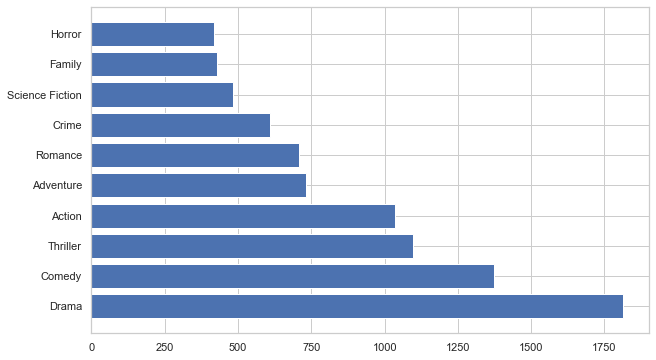

In [402]:

from matplotlib import pyplot as plt
from collections import Counter
from itertools import chain
plt.figure(figsize=(10,6))
counts = Counter(chain.from_iterable(movies['genres']))
plt.barh(*zip(*counts.most_common(10))) #this displays the 10 most common genre from the list

plt.show() #[:-n-1:-1])

### 6.1 What kind of genre is the least common?
least 5 genre used in movies

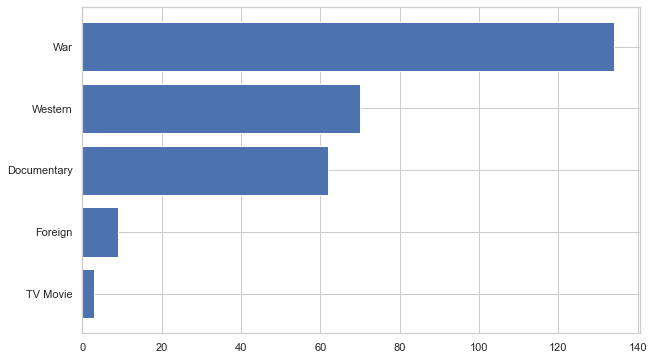

In [403]:
n=5
from matplotlib import pyplot as plt
from collections import Counter
from itertools import chain
plt.figure(figsize=(10,6))
counts = Counter(chain.from_iterable(movies['genres']))
plt.barh(*zip(*counts.most_common()[:-n-1:-1])) #this displays the 10 least common genre from the list

plt.show() #

### 7.The production company which has produced more movies

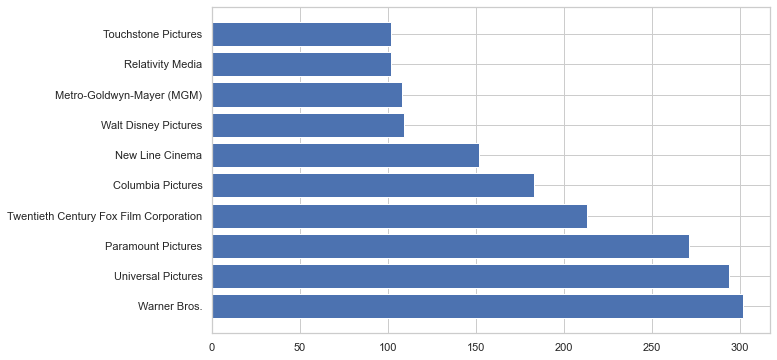

In [404]:
#production companies
from matplotlib import pyplot as plt
from collections import Counter
from itertools import chain
plt.figure(figsize=(10,6))
counts = Counter(chain.from_iterable(movies['production_companies']))
plt.barh(*zip(*counts.most_common(10)))

plt.show()

### 8. The countries that tops the investment into movies

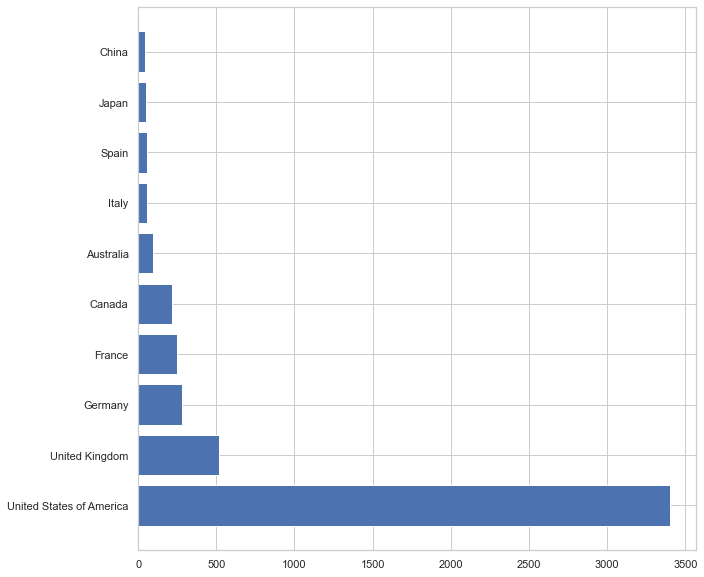

In [405]:
#production countries
from matplotlib import pyplot as plt
from collections import Counter
from itertools import chain
plt.figure(figsize=(10,10))
counts = Counter(chain.from_iterable(movies['production_countries']))
plt.barh(*zip(*counts.most_common(10)))

plt.show()

### 9.Movie with Longest And Shortest Runtime

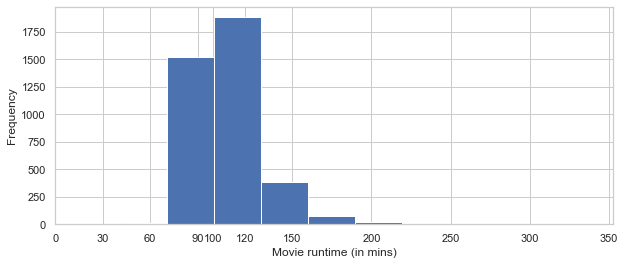

In [406]:
plt.hist(movies.runtime)
plt.xticks([0,30,60,90,100,120,150,200,250,300,350])
plt.xlabel('Movie runtime (in mins)')
plt.ylabel('Frequency')
plt.show()

In [407]:
#wrong-correct it
high_runtime=movies.runtime.idxmax()
low_runtime=movies.runtime.idxmin()  
    #print the movie with high and low profit
print("Movie Which Has Highest runtime "+ " : ",movies.title[high_runtime],movies.runtime[high_runtime],"mins")
print("Movie Which Has Lowest runtime "+ "  : ",movies.title[high_runtime],movies.runtime[low_runtime],"mins")
#movies.iloc[movies.index[vote_average_index]]

Movie Which Has Highest runtime  :  Carlos 338.0 mins
Movie Which Has Lowest runtime   :  Carlos 41.0 mins


### 10.Ratings Vs Popularity

[Text(0.5, 1.0, 'Ratings Vs Popularity')]

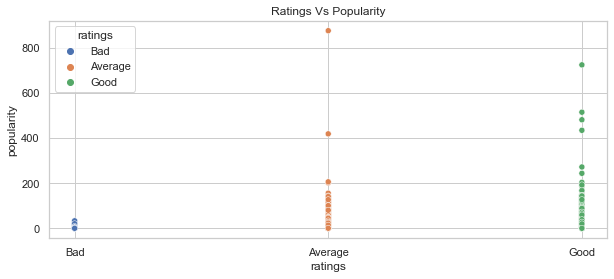

In [408]:

plt_1 = plt.figure(figsize=(10, 4))
sns.scatterplot(x="ratings", y='popularity',hue='ratings', data=movies).set(title='Ratings Vs Popularity')

### 11. Profit Vs Popularity

[Text(0.5, 1.0, 'Profit Vs Popularity')]

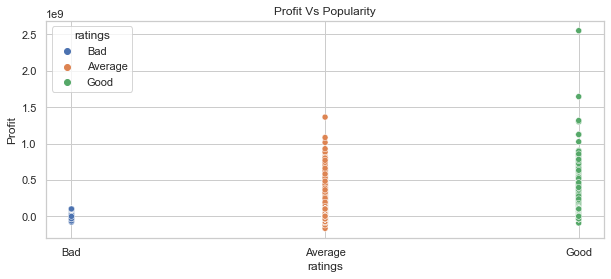

In [409]:
plt_1 = plt.figure(figsize=(10, 4))
sns.scatterplot(x="ratings", y='Profit',hue='ratings', data=movies).set(title='Profit Vs Popularity')

### Count of movies and their ratings

[Text(0.5, 1.0, 'Ratings')]

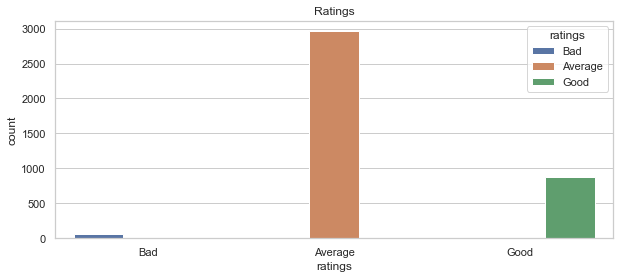

In [410]:

plt_1 = plt.figure(figsize=(10, 4))
sns.countplot(x="ratings",hue='ratings', data=movies).set(title='Ratings')

### 12. How does the profit gets affected by budget and vote_average

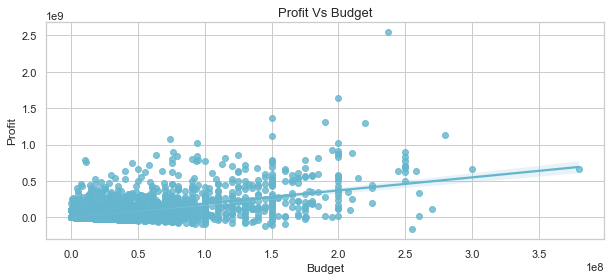

In [411]:
#how does revenue change according to their budget.
#make a scatter plot using 'regplot' between ''profit' and 'budget'.
ax = sns.regplot(x=movies['budget'], y=movies['Profit'],color='c')

#set the title and labels of the figure
ax.set_title("Profit Vs Budget",fontsize=13)
ax.set_xlabel("Budget",fontsize=12)
ax.set_ylabel("Profit",fontsize=12)
#set the figure size
sns.set(rc={'figure.figsize':(12,4)})
sns.set_style("whitegrid")

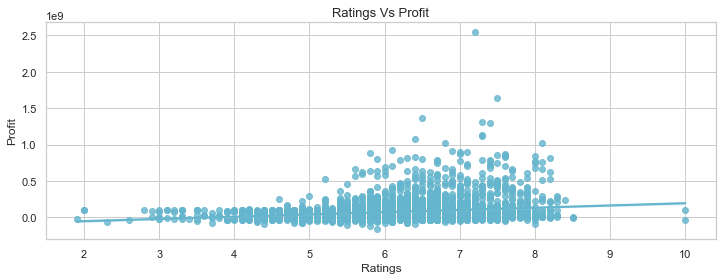

In [412]:
ax = sns.regplot(x=movies['vote_average'], y=movies['Profit'],color='c')

#set the title and labels of the figure
ax.set_title("Ratings Vs Profit",fontsize=13)
ax.set_xlabel("Ratings",fontsize=12)
ax.set_ylabel("Profit",fontsize=12)
#set the figure size
sns.set(rc={'figure.figsize':(10,4)})
sns.set_style("whitegrid")

### Analysing the relation between genre and profit

In [413]:
df_genres = movies.explode('genres')
df_genres.head()

,budget,genres,id,keywords,original_language,popularity,production_companies,production_countries,release_date,revenue,...,spoken_languages,status,title,vote_average,vote_count,cast,crew,ratings,year,Profit
0,237000000.0,Action,19995,"[culture clash, future, space war, space colon...",en,150.437577,"[Ingenious Film Partners, Twentieth Century Fo...","[United States of America, United Kingdom]",2009-12-10,2.787965e+09,...,"[English, Español]",Released,Avatar,7.2,11800,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...",Good,2009,2.550965e+09
0,237000000.0,Adventure,19995,"[culture clash, future, space war, space colon...",en,150.437577,"[Ingenious Film Partners, Twentieth Century Fo...","[United States of America, United Kingdom]",2009-12-10,2.787965e+09,...,"[English, Español]",Released,Avatar,7.2,11800,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...",Good,2009,2.550965e+09
0,237000000.0,Fantasy,19995,"[culture clash, future, space war, space colon...",en,150.437577,"[Ingenious Film Partners, Twentieth Century Fo...","[United States of America, United Kingdom]",2009-12-10,2.787965e+09,...,"[English, Español]",Released,Avatar,7.2,11800,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...",Good,2009,2.550965e+09
0,237000000.0,Science Fiction,19995,"[culture clash, future, space war, space colon...",en,150.437577,"[Ingenious Film Partners, Twentieth Century Fo...","[United States of America, United Kingdom]",2009-12-10,2.787965e+09,...,"[English, Español]",Released,Avatar,7.2,11800,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...",Good,2009,2.550965e+09
1,300000000.0,Adventure,285,"[ocean, drug abuse, exotic island, east india ...",en,139.082615,"[Walt Disney Pictures, Jerry Bruckheimer Films...",[United States of America],2007-05-19,9.610000e+08,...,[English],Released,Pirates of the Caribbean: At World's End,6.9,4500,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de...",Average,2007,6.610000e+08


In [414]:
df_genres.genres.unique()

array(['Action', 'Adventure', 'Fantasy', 'Science Fiction', 'Crime',
       'Drama', 'Thriller', 'Animation', 'Family', 'Western', 'Comedy',
       'Romance', 'Horror', 'Mystery', 'History', 'War', 'Music',
       'Documentary', 'Foreign', 'TV Movie', nan], dtype=object)

<AxesSubplot:title={'center':'Genres Vs Profit'}, xlabel='Genres', ylabel='Profit'>

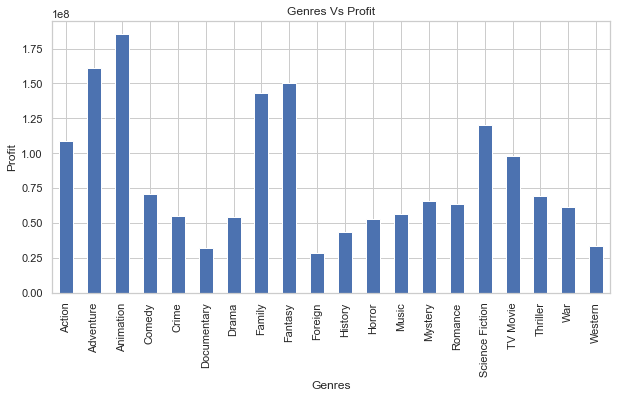

In [415]:
pt = df_genres.groupby(['genres'])['Profit'].mean()

pt.plot(kind='bar', title='Genres Vs Profit', ylabel='Profit',xlabel='Genres', figsize=(10, 5))


<AxesSubplot:title={'center':'Genres Vs Popularity'}, xlabel='Genres', ylabel='Popularity'>

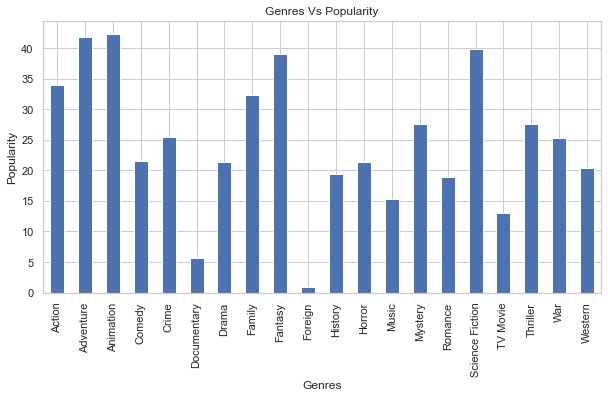

In [416]:
pt = df_genres.groupby(['genres'])['popularity'].mean()

pt.plot(kind='bar', title='Genres Vs Popularity', ylabel='Popularity',xlabel='Genres', figsize=(10, 5))


### Exploring the crew and cast information

In [417]:
#processing the cast and crew data
columns = ['cast', 'crew']

for col in columns: 
    movies[col] = movies[col].apply(json.loads)
    
movies['cast_info'] = movies['cast'].map(lambda x:[ [i['name'],i['character']] for i in x])
movies['crew_info'] = movies['crew'].map(lambda x:[ [i['name'],i['job'],i['department']] for i in x])

In [418]:
movies.cast_info[0][:1]

[['Sam Worthington', 'Jake Sully']]

In [419]:
movies.crew_info[0][:]

[['Stephen E. Rivkin', 'Editor', 'Editing'],
 ['Rick Carter', 'Production Design', 'Art'],
 ['Christopher Boyes', 'Sound Designer', 'Sound'],
 ['Christopher Boyes', 'Supervising Sound Editor', 'Sound'],
 ['Mali Finn', 'Casting', 'Production'],
 ['James Horner', 'Original Music Composer', 'Sound'],
 ['James Cameron', 'Director', 'Directing'],
 ['James Cameron', 'Writer', 'Writing'],
 ['James Cameron', 'Editor', 'Editing'],
 ['James Cameron', 'Producer', 'Production'],
 ['James Cameron', 'Screenplay', 'Writing'],
 ['Andrew Menzies', 'Art Direction', 'Art'],
 ['Jill Brooks', 'Visual Effects Producer', 'Visual Effects'],
 ['Margery Simkin', 'Casting', 'Production'],
 ['Kevin Ishioka', 'Supervising Art Director', 'Art'],
 ['Dick Bernstein', 'Music Editor', 'Sound'],
 ['Shannon Mills', 'Sound Effects Editor', 'Sound'],
 ['Dennie Thorpe', 'Foley', 'Sound'],
 ['Jana Vance', 'Foley', 'Sound'],
 ['Deborah Lynn Scott', 'Costume Design', 'Costume & Make-Up'],
 ['Jon Landau', 'Producer', 'Productio

# Exploring the crew information

In [420]:
df_crew=movies.explode('crew_info')


In [421]:
df_crew.crew_info.head(10)

0                 [Stephen E. Rivkin, Editor, Editing]
0                [Rick Carter, Production Design, Art]
0           [Christopher Boyes, Sound Designer, Sound]
0    [Christopher Boyes, Supervising Sound Editor, ...
0                     [Mali Finn, Casting, Production]
0       [James Horner, Original Music Composer, Sound]
0                 [James Cameron, Director, Directing]
0                     [James Cameron, Writer, Writing]
0                     [James Cameron, Editor, Editing]
0                [James Cameron, Producer, Production]
Name: crew_info, dtype: object

In [422]:
#df_crew.crew_info[:4].str[0]
df_crew["crew_name"] = df_crew["crew_info"].str[0]
df_crew["crew_job"] = df_crew["crew_info"].str[1]

In [423]:
df_crew.crew_job


0                         Editor
0              Production Design
0                 Sound Designer
0       Supervising Sound Editor
0                        Casting
                  ...           
4798                    Producer
4798              Cinematography
4798                       Music
4798                      Editor
4798                    Producer
Name: crew_job, Length: 120179, dtype: object

In [424]:
#extracting only the music and director information for viz
df_music=df_crew.loc[df_crew['crew_job'] == 'Original Music Composer']
df_dir=df_crew.loc[df_crew['crew_job'] == 'Director']

In [425]:
df_dir.head()

,budget,genres,id,keywords,original_language,popularity,production_companies,production_countries,release_date,revenue,...,vote_count,cast,crew,ratings,year,Profit,cast_info,crew_info,crew_name,crew_job
0,237000000.0,"[Action, Adventure, Fantasy, Science Fiction]",19995,"[culture clash, future, space war, space colon...",en,150.437577,"[Ingenious Film Partners, Twentieth Century Fo...","[United States of America, United Kingdom]",2009-12-10,2.787965e+09,...,11800,"[{'cast_id': 242, 'character': 'Jake Sully', '...","[{'credit_id': '52fe48009251416c750aca23', 'de...",Good,2009,2.550965e+09,"[[Sam Worthington, Jake Sully], [Zoe Saldana, ...","[James Cameron, Director, Directing]",James Cameron,Director
1,300000000.0,"[Adventure, Fantasy, Action]",285,"[ocean, drug abuse, exotic island, east india ...",en,139.082615,"[Walt Disney Pictures, Jerry Bruckheimer Films...",[United States of America],2007-05-19,9.610000e+08,...,4500,"[{'cast_id': 4, 'character': 'Captain Jack Spa...","[{'credit_id': '52fe4232c3a36847f800b579', 'de...",Average,2007,6.610000e+08,"[[Johnny Depp, Captain Jack Sparrow], [Orlando...","[Gore Verbinski, Director, Directing]",Gore Verbinski,Director
2,245000000.0,"[Action, Adventure, Crime]",206647,"[spy, based on novel, secret agent, sequel, mi...",en,107.376788,"[Columbia Pictures, Danjaq, B24]","[United Kingdom, United States of America]",2015-10-26,8.806746e+08,...,4466,"[{'cast_id': 1, 'character': 'James Bond', 'cr...","[{'credit_id': '54805967c3a36829b5002c41', 'de...",Average,2015,6.356746e+08,"[[Daniel Craig, James Bond], [Christoph Waltz,...","[Sam Mendes, Director, Directing]",Sam Mendes,Director
3,250000000.0,"[Action, Crime, Drama, Thriller]",49026,"[dc comics, crime fighter, terrorist, secret i...",en,112.312950,"[Legendary Pictures, Warner Bros., DC Entertai...",[United States of America],2012-07-16,1.084939e+09,...,9106,"[{'cast_id': 2, 'character': 'Bruce Wayne / Ba...","[{'credit_id': '52fe4781c3a36847f81398c3', 'de...",Good,2012,8.349391e+08,"[[Christian Bale, Bruce Wayne / Batman], [Mich...","[Christopher Nolan, Director, Directing]",Christopher Nolan,Director
4,260000000.0,"[Action, Adventure, Science Fiction]",49529,"[based on novel, mars, medallion, space travel...",en,43.926995,[Walt Disney Pictures],[United States of America],2012-03-07,2.841391e+08,...,2124,"[{'cast_id': 5, 'character': 'John Carter', 'c...","[{'credit_id': '52fe479ac3a36847f813eaa3', 'de...",Average,2012,2.413910e+07,"[[Taylor Kitsch, John Carter], [Lynn Collins, ...","[Andrew Stanton, Director, Directing]",Andrew Stanton,Director


<AxesSubplot:title={'center':'Music Composer Vs Popularity'}, xlabel='Crew_Name', ylabel='Popularity'>

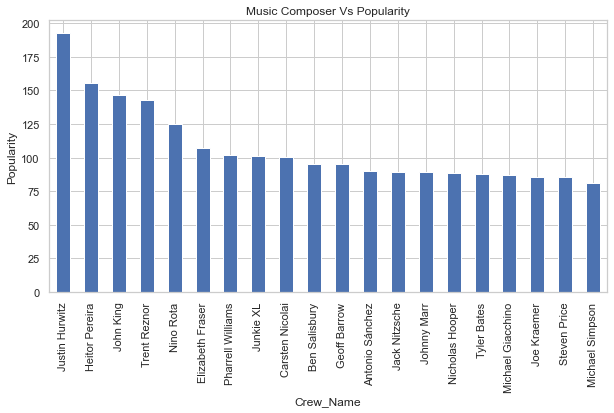

In [426]:
#popular musicians
pt = df_music.groupby(['crew_name'])['popularity'].mean().sort_values(ascending=False).head(20)


pt.plot(kind='bar', title='Music Composer Vs Popularity', ylabel='Popularity',xlabel='Crew_Name', figsize=(10, 5))

<AxesSubplot:title={'center':'Director Vs Popularity'}, xlabel='Director_Name', ylabel='[Popularity]'>

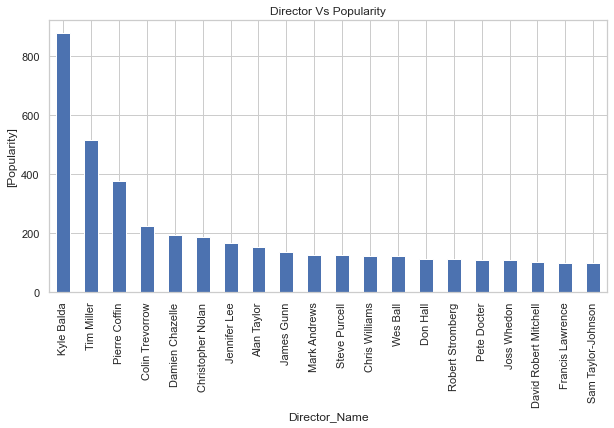

In [427]:
# popular directors
pt = df_dir.groupby(['crew_name'])['popularity'].mean().sort_values(ascending=False).head(20)


pt.plot(kind='bar', title='Director Vs Popularity', ylabel=['Popularity'],xlabel='Director_Name', figsize=(10, 5))

<AxesSubplot:title={'center':'Director Vs Profit'}, ylabel='Director_Name'>

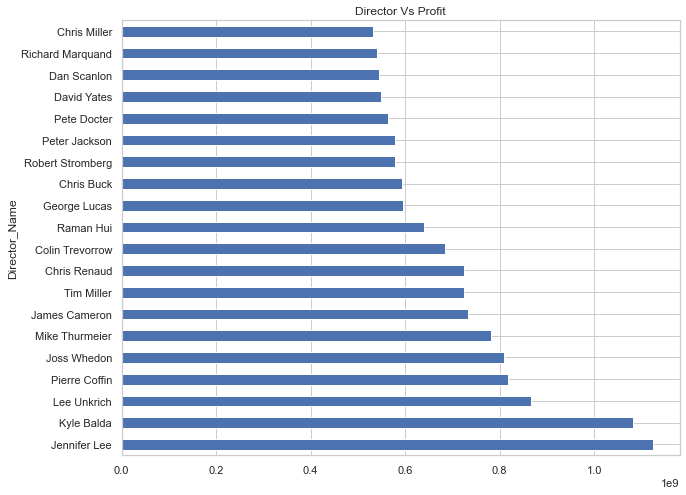

In [428]:
#Directors with highest Profit
pt = df_dir.groupby(['crew_name'])['Profit'].mean().sort_values(ascending=False).head(20)


pt.plot(kind='barh', title='Director Vs Profit', ylabel='Profit',xlabel='Director_Name', figsize=(10, 8))


<AxesSubplot:title={'center':'Director Vs Rating'}, ylabel='Director_Name'>

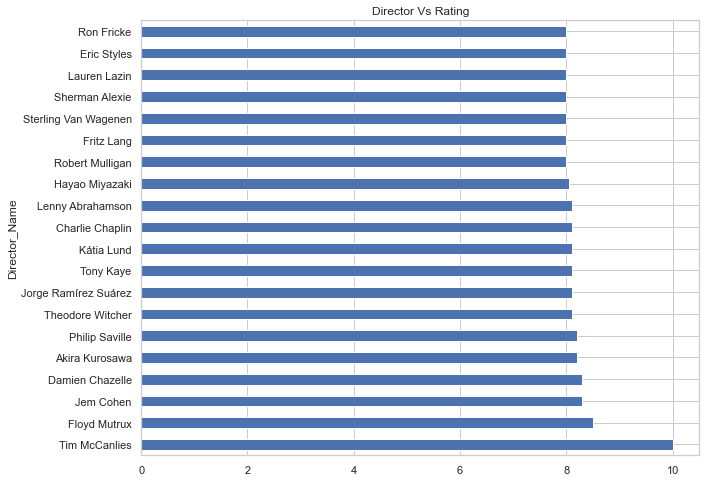

In [429]:
#Director's movie with highest ratings
pt = df_dir.groupby(['crew_name'])['vote_average'].mean().sort_values(ascending=False).head(20)


pt.plot(kind='barh', title='Director Vs Rating', ylabel='Rating',xlabel='Director_Name', figsize=(10, 8))

<AxesSubplot:xlabel='crew_name'>

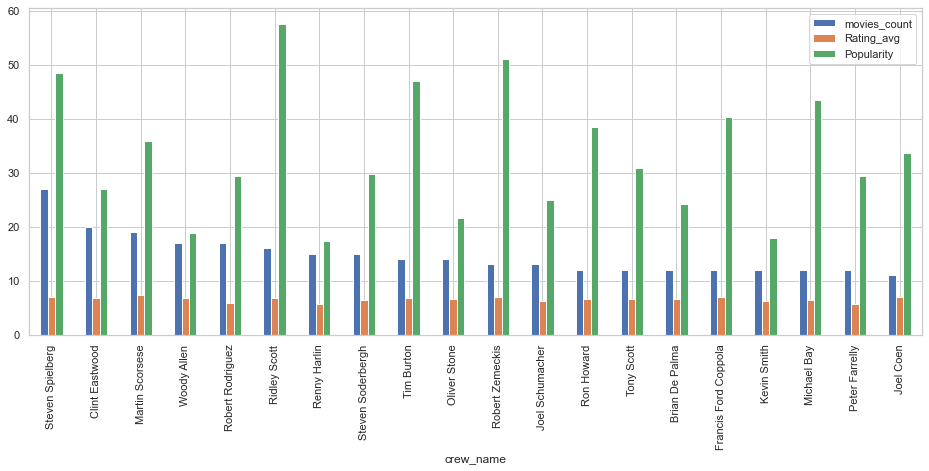

In [430]:
#Comparison of Movie_count, popularity and Ratings of directors
df_dir_pop = df_dir.groupby(['crew_name']).agg(movies_count=('id','count'),Rating_avg=('vote_average','mean'),Popularity=('popularity','mean'))
df_dir_pop1=df_dir_pop.sort_values(by=['movies_count'],ascending=False).head(20)
df_dir_pop1.reset_index(inplace = True)
df_dir_pop1.plot(x="crew_name", y=["movies_count","Rating_avg","Popularity"], kind="bar", figsize=(16, 6))

### Exploring cast information

In [431]:
df_cast=movies.explode('cast_info')

In [432]:
df_cast["cast_name"] = df_cast["cast_info"].str[0]
df_cast["cast_character"] = df_cast["cast_info"].str[1]

In [433]:
df_cast.head()

,budget,genres,id,keywords,original_language,popularity,production_companies,production_countries,release_date,revenue,...,vote_count,cast,crew,ratings,year,Profit,cast_info,crew_info,cast_name,cast_character
0,237000000.0,"[Action, Adventure, Fantasy, Science Fiction]",19995,"[culture clash, future, space war, space colon...",en,150.437577,"[Ingenious Film Partners, Twentieth Century Fo...","[United States of America, United Kingdom]",2009-12-10,2.787965e+09,...,11800,"[{'cast_id': 242, 'character': 'Jake Sully', '...","[{'credit_id': '52fe48009251416c750aca23', 'de...",Good,2009,2.550965e+09,"[Sam Worthington, Jake Sully]","[[Stephen E. Rivkin, Editor, Editing], [Rick C...",Sam Worthington,Jake Sully
0,237000000.0,"[Action, Adventure, Fantasy, Science Fiction]",19995,"[culture clash, future, space war, space colon...",en,150.437577,"[Ingenious Film Partners, Twentieth Century Fo...","[United States of America, United Kingdom]",2009-12-10,2.787965e+09,...,11800,"[{'cast_id': 242, 'character': 'Jake Sully', '...","[{'credit_id': '52fe48009251416c750aca23', 'de...",Good,2009,2.550965e+09,"[Zoe Saldana, Neytiri]","[[Stephen E. Rivkin, Editor, Editing], [Rick C...",Zoe Saldana,Neytiri
0,237000000.0,"[Action, Adventure, Fantasy, Science Fiction]",19995,"[culture clash, future, space war, space colon...",en,150.437577,"[Ingenious Film Partners, Twentieth Century Fo...","[United States of America, United Kingdom]",2009-12-10,2.787965e+09,...,11800,"[{'cast_id': 242, 'character': 'Jake Sully', '...","[{'credit_id': '52fe48009251416c750aca23', 'de...",Good,2009,2.550965e+09,"[Sigourney Weaver, Dr. Grace Augustine]","[[Stephen E. Rivkin, Editor, Editing], [Rick C...",Sigourney Weaver,Dr. Grace Augustine
0,237000000.0,"[Action, Adventure, Fantasy, Science Fiction]",19995,"[culture clash, future, space war, space colon...",en,150.437577,"[Ingenious Film Partners, Twentieth Century Fo...","[United States of America, United Kingdom]",2009-12-10,2.787965e+09,...,11800,"[{'cast_id': 242, 'character': 'Jake Sully', '...","[{'credit_id': '52fe48009251416c750aca23', 'de...",Good,2009,2.550965e+09,"[Stephen Lang, Col. Quaritch]","[[Stephen E. Rivkin, Editor, Editing], [Rick C...",Stephen Lang,Col. Quaritch
0,237000000.0,"[Action, Adventure, Fantasy, Science Fiction]",19995,"[culture clash, future, space war, space colon...",en,150.437577,"[Ingenious Film Partners, Twentieth Century Fo...","[United States of America, United Kingdom]",2009-12-10,2.787965e+09,...,11800,"[{'cast_id': 242, 'character': 'Jake Sully', '...","[{'credit_id': '52fe48009251416c750aca23', 'de...",Good,2009,2.550965e+09,"[Michelle Rodriguez, Trudy Chacon]","[[Stephen E. Rivkin, Editor, Editing], [Rick C...",Michelle Rodriguez,Trudy Chacon


<AxesSubplot:title={'center':'Cast Vs Popularity'}, ylabel='Cast_Name'>

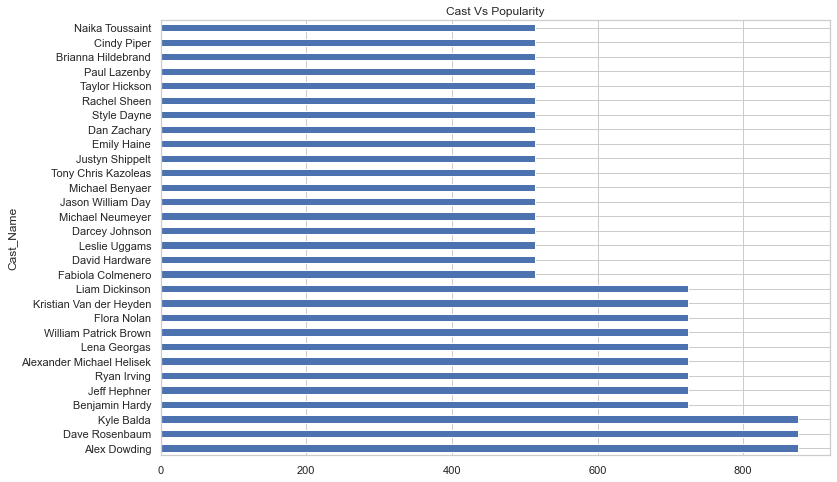

In [434]:
# The cast and the popularity
pt = df_cast.groupby(['cast_name'])['popularity'].mean().sort_values(ascending=False).head(30)


pt.plot(kind='barh', title='Cast Vs Popularity', ylabel='Popularity',xlabel='Cast_Name', figsize=(12, 8))

<AxesSubplot:title={'center':'Cast Vs Ratings'}, ylabel='Cast_Name'>

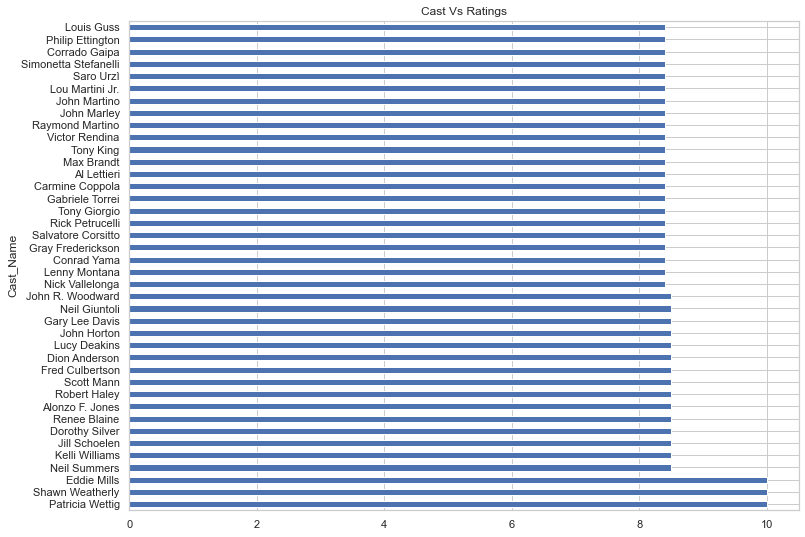

In [435]:
# The popular cast and the ratings
pt = df_cast.groupby(['cast_name'])['vote_average'].mean().sort_values(ascending=False).head(40)


pt.plot(kind='barh', title='Cast Vs Ratings', ylabel='Ratings',xlabel='Cast_Name', figsize=(12, 9))

<AxesSubplot:title={'center':'Cast Vs #Movies'}, ylabel='Cast_Name'>

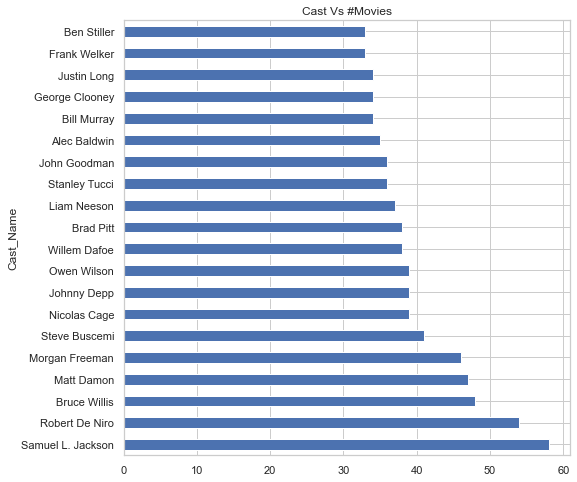

In [436]:
# Who(which hero) did the most number of movies
pt = df_cast.groupby(['cast_name'])['id'].count().sort_values(ascending=False).head(20)


pt.plot(kind='barh', title='Cast Vs #Movies', ylabel='count of movies',xlabel='Cast_Name', figsize=(8, 8))

<AxesSubplot:xlabel='cast_name'>

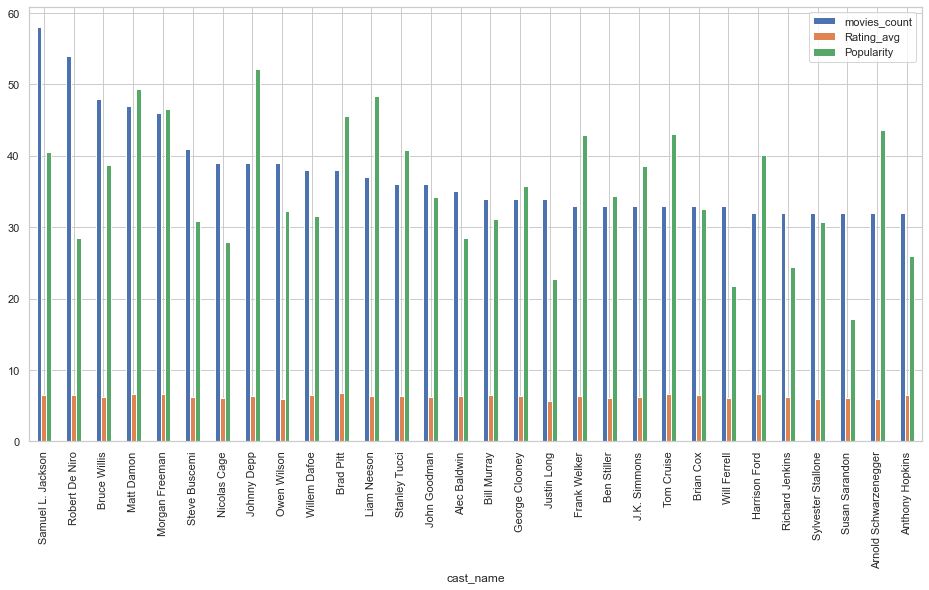

In [437]:
df1 = df_cast.groupby(['cast_name']).agg(movies_count=('id','count'),Rating_avg=('vote_average','mean'),Popularity=('popularity','mean'))
df2=df1.sort_values(by=['movies_count'],ascending=False).head(30)
df2.reset_index(inplace = True)
df2.plot(x="cast_name", y=["movies_count","Rating_avg","Popularity"], kind="bar", figsize=(16, 8))

#https://www.easytweaks.com/pandas-group-one-multiple-columns/

### Modelling

#USE CASE 1

Classification Problem:
    Problem statement: Classify the movie ratings for the movies
    1. Find the relevant features for classification
    2. Evaluate the performance of the classifier 

After the extensive EDA, the following attributes were considered as 'crucial' for movie rating prediction
1.budget
2.genres
3.popularity
4.runtime
5.Release month of the year
6.original language


In [438]:
movies['month'] = movies['release_date'].dt.month

In [439]:
data=movies[['budget','original_language','popularity','month','revenue','runtime','vote_count','ratings']]

In [440]:
obj=[]
for i in data.select_dtypes('object').columns:
  obj.append(i)

# converting non-numeric columns into categorical datatype column
for i in obj:
  data[i]=data[i].astype('category')

# checking datatypes of all columns after coverting datatype into categorical columns
print('Datatype of all columns in dataset :')
data.dtypes

Datatype of all columns in dataset :


budget                float64
original_language    category
popularity            float64
month                   int64
revenue               float64
runtime               float64
vote_count              int64
ratings              category
dtype: object

In [441]:
category=[]
for i in data.select_dtypes('category').columns:
  category.append(i)

# label encoder technique to convert categorical column to numerical type
for i in category:
  data[i+str('_encode')] = preprocessing.LabelEncoder().fit_transform(data[i])

data.head()

,budget,original_language,popularity,month,revenue,runtime,vote_count,ratings,original_language_encode,ratings_encode
0,237000000.0,en,150.437577,12,2.787965e+09,162.0,11800,Good,5,2
1,300000000.0,en,139.082615,5,9.610000e+08,169.0,4500,Average,5,0
2,245000000.0,en,107.376788,10,8.806746e+08,148.0,4466,Average,5,0
3,250000000.0,en,112.312950,7,1.084939e+09,165.0,9106,Good,5,2
4,260000000.0,en,43.926995,3,2.841391e+08,132.0,2124,Average,5,0


In [442]:
# Defining method to perform data scaling operation based on the type of scaling
def feature_scale(scale):
 numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
 data_new = data.select_dtypes(include=numerics)
 data_new =data_new.drop(['ratings_encode'],axis=1)#df.drop(['A'], axis=1)
 if scale == 'minmax':
     scaler = MinMaxScaler()
 else:
     scaler = StandardScaler()
 data_scaled = pd.DataFrame(scaler.fit_transform(data_new.to_numpy()),columns=data_new.columns)
 return data_scaled

In [443]:
# scaling the data using MinMax Scaling process
scale = 'minmax' 
data_scaled=feature_scale(scale)
data_scaled['Ratings'] = data.ratings_encode.values
data_scaled.head()

,budget,popularity,month,revenue,runtime,vote_count,original_language_encode,Ratings
0,0.623684,0.171813,1.000000,1.000000,0.407407,0.858047,0.166667,2
1,0.789474,0.158845,0.363636,0.344696,0.430976,0.327176,0.166667,0
2,0.644737,0.122633,0.818182,0.315884,0.360269,0.324704,0.166667,0
3,0.657895,0.128271,0.545455,0.389151,0.417508,0.662134,0.166667,2
4,0.684211,0.050167,0.181818,0.101916,0.306397,0.154389,0.166667,0


In [444]:
data_scaled.shape

(3902, 8)

In [445]:
X_cls=data_scaled[['budget','original_language_encode','popularity','month','revenue','runtime','vote_count']]
Y_cls=data[['ratings_encode']]

#Feature selection based on information gain

<AxesSubplot:>

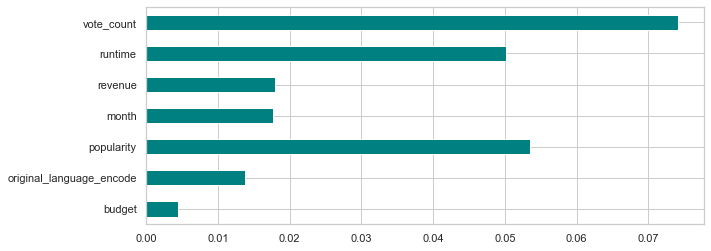

In [446]:
importance=[]
from sklearn.feature_selection import mutual_info_classif
importance = mutual_info_classif(X_cls.values, Y_cls.values)
feat_importance = pd.Series(importance, X_cls.columns[0: len(X_cls.columns)])
feat_importance.plot(kind='barh', color='teal')

In [447]:
#Feature selection based on correlation coeff

In [448]:
corr=data_scaled.corr().style.background_gradient(cmap='PuRd')
corr


,budget,popularity,month,revenue,runtime,vote_count,original_language_encode,Ratings
budget,1.000000,0.452464,0.028282,0.684181,0.249310,0.552949,-0.057250,-0.037228
popularity,0.452464,1.000000,0.028417,0.596882,0.206143,0.763110,-0.050323,0.232853
month,0.028282,0.028417,1.000000,0.037049,0.155791,0.027371,0.001622,0.108946
revenue,0.684181,0.596882,0.037049,1.000000,0.225821,0.746519,-0.045840,0.126481
runtime,0.249310,0.206143,0.155791,0.225821,1.000000,0.272261,0.064627,0.295856
vote_count,0.552949,0.763110,0.027371,0.746519,0.272261,1.000000,-0.057234,0.317221
original_language_encode,-0.057250,-0.050323,0.001622,-0.045840,0.064627,-0.057234,1.000000,0.063620
Ratings,-0.037228,0.232853,0.108946,0.126481,0.295856,0.317221,0.063620,1.000000


In [449]:
#Correlation with output variable
corr1=data_scaled.corr()
cor_target = abs(corr1["Ratings"])
#Selecting highly correlated features
relevant_features = cor_target[(cor_target!=1.0)]
s=relevant_features.sort_values(ascending=False)
print(s)
#relevant_features = relevant_features[cor_target>0.02]
feat=s.index.tolist()
#feat

vote_count                  0.317221
runtime                     0.295856
popularity                  0.232853
revenue                     0.126481
month                       0.108946
original_language_encode    0.063620
budget                      0.037228
Name: Ratings, dtype: float64


### Train test split

In [450]:
y = Y_cls
X = X_cls[feat]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=20)
print("Shape of new dataframes - {} , {}".format(X_train.shape, X_test.shape))

Shape of new dataframes - (2731, 7) , (1171, 7)


#Model 1: Naive Bayes

In [451]:
from sklearn.naive_bayes import GaussianNB                       
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix                    
from sklearn.metrics import recall_score                         
from sklearn.metrics import f1_score                         
from sklearn.metrics import accuracy_score                      
from sklearn.metrics import precision_score                      
from sklearn.metrics import roc_auc_score                       
from sklearn.metrics import roc_curve                           
from sklearn import metrics                                      
from sklearn.metrics import ConfusionMatrixDisplay 
# Fitting Naive Bayes to the Training set  
classifier_nb = GaussianNB()  
naive_bayes = classifier_nb.fit(X_train, y_train) 
y_pred_nb = classifier_nb.predict(X_test)


In [452]:
y_pred_nb

array([2, 2, 1, ..., 1, 0, 1])

In [453]:
#Evaluation metrics
nb_acc=accuracy_score(y_test, y_pred_nb)
nb_prec=precision_score(y_test, y_pred_nb,average='macro')
nb_rec=recall_score(y_test, y_pred_nb,average='macro')
nb_f1=f1_score(y_test, y_pred_nb,average='macro')
preds = classifier_nb.predict_proba(X_test)
nb_auc = roc_auc_score(y_test,preds,multi_class='ovr')
print('Naive Bayes performnce metrics')
print('Accuracy: %.3f' %nb_acc)
print('Recall: %.3f' %nb_prec)
print('F1-score: %.3f' %nb_rec )
print('Precision: %.3f' %nb_f1 )
print('AUC: %.3f' % nb_auc)
nb_scores=pd.Series([nb_acc,nb_prec,nb_rec,nb_f1,nb_auc])

Naive Bayes performnce metrics
Accuracy: 0.532
Recall: 0.450
F1-score: 0.597
Precision: 0.385
AUC: 0.696


#Model 2: Decision Trees

In [454]:
dtc = DecisionTreeClassifier(max_depth=3)
# Train Decision Tree Classifer
dtc_model = dtc.fit(X_train,y_train)
y_pred_dtc = dtc.predict(X_test)

In [455]:
#Evaluation metrics
dt_acc=accuracy_score(y_test, y_pred_dtc)
dt_prec=precision_score(y_test, y_pred_dtc,average='macro')
dt_rec=recall_score(y_test, y_pred_dtc,average='macro')
dt_f1=f1_score(y_test, y_pred_dtc,average='macro')
preds=dtc.predict_proba(X_test)
dt_auc = roc_auc_score(y_test, preds,multi_class='ovr')

print('Decision Tree Performance metrics')
print('Accuracy: %.3f' %dt_acc)
print('Recall: %.3f' %dt_prec)
print('F1-score: %.3f' %dt_rec )
print('Precision: %.3f' %dt_f1 )
print('AUC: %.3f' % dt_auc)

Decision Tree Performance metrics
Accuracy: 0.794
Recall: 0.559
F1-score: 0.373
Precision: 0.366
AUC: 0.659


In [456]:
dt_scores=pd.Series([dt_acc,dt_prec,dt_rec,dt_f1,dt_auc])

#Model 3: Random Forest

In [457]:
# Bagging with Random forest
from sklearn.ensemble import RandomForestClassifier 
rfc = RandomForestClassifier(n_estimators= 10)
rfc_clf = rfc.fit(X_train,y_train)
y_pred_rfc= rfc.predict(X_test)


In [458]:
#Evaluation metrics
rfc_acc=accuracy_score(y_test, y_pred_rfc)
rfc_prec=precision_score(y_test, y_pred_rfc,average='macro')
rfc_rec=recall_score(y_test, y_pred_rfc,average='macro')
rfc_f1=f1_score(y_test, y_pred_rfc,average='macro')
preds=rfc.predict_proba(X_test) #https://fixexception.com/scikit-learn/multi-class-must-be-in-ovo-ovr/
rfc_auc = roc_auc_score(y_test, preds,multi_class='ovr')

print('Random Forest Performance metrics')
print('Accuracy: %.3f' %rfc_acc)
print('Recall: %.3f' %rfc_prec)
print('F1-score: %.3f' %rfc_rec )
print('Precision: %.3f' %rfc_f1 )
print('AUC: %.3f' % rfc_auc)

Random Forest Performance metrics
Accuracy: 0.822
Recall: 0.577
F1-score: 0.471
Precision: 0.499
AUC: 0.720


In [459]:
rf_scores=pd.Series([rfc_acc,rfc_prec,rfc_rec,rfc_f1,rfc_auc])

#Model 4: KNN

Text(0, 0.5, 'Mean Error')

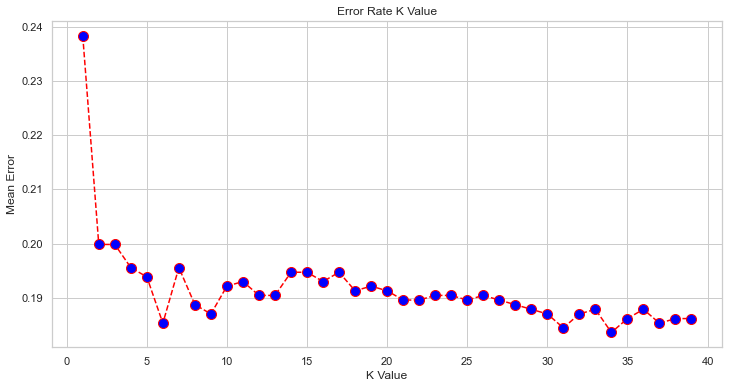

In [460]:
from sklearn.neighbors import KNeighborsClassifier
error = []
# Calculating error for K values between 1 and 40
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test).ravel()
    error.append(np.mean(pred_i != (y_test).values.ravel()))

plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

In [461]:
#Training the model using  k value
#K=5 is chosen here
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn=knn.predict(X_test)

In [462]:
#Evaluation metrics
knn_acc=accuracy_score(y_test, y_pred_knn)
knn_prec=precision_score(y_test, y_pred_knn,average='macro')
knn_rec=recall_score(y_test, y_pred_knn,average='macro')
knn_f1=f1_score(y_test, y_pred_knn,average='macro')
preds= knn.predict_proba(X_test)
knn_auc = roc_auc_score(y_test, preds,multi_class='ovr')

print('KNN Performance metrics')
print('Accuracy: %.3f' %knn_acc)
print('Recall: %.3f' %knn_prec)
print('F1-score: %.3f' %knn_rec )
print('Precision: %.3f' %knn_f1 )
print('AUC: %.3f' % knn_auc)

KNN Performance metrics
Accuracy: 0.806
Recall: 0.488
F1-score: 0.442
Precision: 0.455
AUC: 0.680


In [463]:
knn_scores=pd.Series([knn_acc,knn_prec,knn_rec,knn_f1,knn_auc])

### Comparison table of the model performance

In [464]:
scores=pd.DataFrame([nb_scores,dt_scores,rf_scores,knn_scores], index=['NaiveBayes','Decision Tree','Randomforest','KNN'])
scores.columns=['Accuracy','Recall','F1-Score','Precision','AUC']
scores

,Accuracy,Recall,F1-Score,Precision,AUC
NaiveBayes,0.532024,0.450315,0.597183,0.384562,0.696103
Decision Tree,0.794193,0.559029,0.373025,0.366196,0.658815
Randomforest,0.821520,0.577164,0.471198,0.498853,0.720337
KNN,0.806149,0.488312,0.442438,0.454823,0.680337


### Taking Genre information into consideration

In [465]:
#converting genre information to numerics
from sklearn.preprocessing import MultiLabelBinarizer
mlb = MultiLabelBinarizer()
s=movies.genres
genre_info=pd.DataFrame(mlb.fit_transform(s),columns=mlb.classes_, index=movies.index)

In [466]:
genre_info['id']=movies['id']

In [467]:
genre_info.shape

(3902, 21)

In [468]:
data_scaled.columns

Index(['budget', 'popularity', 'month', 'revenue', 'runtime', 'vote_count',
       'original_language_encode', 'Ratings'],
      dtype='object')

In [469]:
data_samp=[]
data_samp=data_scaled


In [470]:
data_samp.shape

(3902, 8)

In [471]:
data_samp.reset_index(drop=True, inplace=True)
genre_info.reset_index(drop=True, inplace=True)

In [472]:
df_new=[]
df_new=pd.concat([data_samp,genre_info],axis=1)

In [473]:
df_new.shape

(3902, 29)

In [474]:
df_new.isnull().sum()

budget                      0
popularity                  0
month                       0
revenue                     0
runtime                     0
vote_count                  0
original_language_encode    0
Ratings                     0
Action                      0
Adventure                   0
Animation                   0
Comedy                      0
Crime                       0
Documentary                 0
Drama                       0
Family                      0
Fantasy                     0
Foreign                     0
History                     0
Horror                      0
Music                       0
Mystery                     0
Romance                     0
Science Fiction             0
TV Movie                    0
Thriller                    0
War                         0
Western                     0
id                          0
dtype: int64

In [475]:
df_new.columns

Index(['budget', 'popularity', 'month', 'revenue', 'runtime', 'vote_count',
       'original_language_encode', 'Ratings', 'Action', 'Adventure',
       'Animation', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Family',
       'Fantasy', 'Foreign', 'History', 'Horror', 'Music', 'Mystery',
       'Romance', 'Science Fiction', 'TV Movie', 'Thriller', 'War', 'Western',
       'id'],
      dtype='object')

In [476]:
X1=df_new.iloc[:,:6]
X2=df_new.iloc[:,8:]
df_final=pd.DataFrame()
X_final=pd.concat([X1,X2],axis=1)
y=df_new.iloc[:,7]

In [477]:
X_final

,budget,popularity,month,revenue,runtime,vote_count,Action,Adventure,Animation,Comedy,...,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western,id
0,6.236842e-01,0.171813,1.000000,1.000000,0.407407,0.858047,1,1,0,0,...,0,0,0,0,1,0,0,0,0,19995
1,7.894737e-01,0.158845,0.363636,0.344696,0.430976,0.327176,1,1,0,0,...,0,0,0,0,0,0,0,0,0,285
2,6.447368e-01,0.122633,0.818182,0.315884,0.360269,0.324704,1,1,0,0,...,0,0,0,0,0,0,0,0,0,206647
3,6.578947e-01,0.128271,0.545455,0.389151,0.417508,0.662134,1,0,0,0,...,0,0,0,0,0,0,1,0,0,49026
4,6.842105e-01,0.050167,0.181818,0.101916,0.306397,0.154389,1,1,0,0,...,0,0,0,0,1,0,0,0,0,49529
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3897,3.157895e-08,0.000378,0.727273,0.036319,0.144781,0.000000,0,0,0,0,...,1,0,0,0,0,0,0,0,0,157185
3898,5.262895e-05,0.000241,0.000000,0.000036,0.235690,0.004509,0,0,0,0,...,1,0,1,0,0,0,1,0,0,36095
3899,1.841842e-05,0.026618,0.727273,0.000152,0.121212,0.047778,0,0,0,0,...,0,0,0,0,1,0,1,0,0,14337
3900,5.789447e-04,0.016296,0.181818,0.000732,0.134680,0.017235,1,0,0,0,...,0,0,0,0,0,0,1,0,0,9367


In [479]:
y

0       2
1       0
2       0
3       2
4       0
       ..
3897    1
3898    2
3899    0
3900    0
3901    0
Name: Ratings, Length: 3902, dtype: int32

In [480]:
X_train, X_test, y_train, y_test = train_test_split(X_final, y, test_size=0.3, random_state=20)
print("Shape of new dataframes - {} , {}".format(X_train.shape, X_test.shape))

Shape of new dataframes - (2731, 27) , (1171, 27)


In [481]:
from sklearn.ensemble import RandomForestClassifier 
rfc = RandomForestClassifier(n_estimators= 10)
rfc_clf = rfc.fit(X_train,y_train)
y_pred_rfc= rfc.predict(X_test)

In [482]:
#Evaluation metrics
rfc_acc=accuracy_score(y_test, y_pred_rfc)
rfc_prec=precision_score(y_test, y_pred_rfc,average='macro')
rfc_rec=recall_score(y_test, y_pred_rfc,average='macro')
rfc_f1=f1_score(y_test, y_pred_rfc,average='macro')
preds=rfc.predict_proba(X_test) #https://fixexception.com/scikit-learn/multi-class-must-be-in-ovo-ovr/
rfc_auc = roc_auc_score(y_test, preds,multi_class='ovr')

print('Random Forest Performance metrics using genre information')
print('Accuracy: %.3f' %rfc_acc)
print('Recall: %.3f' %rfc_prec)
print('F1-score: %.3f' %rfc_rec )
print('Precision: %.3f' %rfc_f1 )
print('AUC: %.3f' % rfc_auc)

Random Forest Performance metrics
Accuracy: 0.826
Recall: 0.522
F1-score: 0.458
Precision: 0.475
AUC: 0.768


In [484]:
print('Performance eval-without genre info')
scores

Performance eval-without genre info


,Accuracy,Recall,F1-Score,Precision,AUC
NaiveBayes,0.532024,0.450315,0.597183,0.384562,0.696103
Decision Tree,0.794193,0.559029,0.373025,0.366196,0.658815
Randomforest,0.821520,0.577164,0.471198,0.498853,0.720337
KNN,0.806149,0.488312,0.442438,0.454823,0.680337


RF and KNN has good accuracy

### Use case 2: Regression problem

To predict the profit of the movie using relevant parameters

In [535]:
data_reg=movies[['budget','original_language','popularity','month','revenue','runtime','vote_count','vote_average']]

In [536]:
obj=[]
for i in data_reg.select_dtypes('object').columns:
  obj.append(i)

# converting non-numeric columns into categorical datatype column
for i in obj:
  data_reg[i]=data_reg[i].astype('category')

# checking datatypes of all columns after coverting datatype into categorical columns
print('Datatype of all columns in dataset :')
data_reg.dtypes

Datatype of all columns in dataset :


budget                float64
original_language    category
popularity            float64
month                   int64
revenue               float64
runtime               float64
vote_count              int64
vote_average          float64
dtype: object

In [537]:
category=[]
for i in data_reg.select_dtypes('category').columns:
  category.append(i)

# label encoder technique to convert categorical column to numerical type
for i in category:
  data_reg[i+str('_encode')] = preprocessing.LabelEncoder().fit_transform(data_reg[i])

data_reg.head()

,budget,original_language,popularity,month,revenue,runtime,vote_count,vote_average,original_language_encode
0,237000000.0,en,150.437577,12,2.787965e+09,162.0,11800,7.2,5
1,300000000.0,en,139.082615,5,9.610000e+08,169.0,4500,6.9,5
2,245000000.0,en,107.376788,10,8.806746e+08,148.0,4466,6.3,5
3,250000000.0,en,112.312950,7,1.084939e+09,165.0,9106,7.6,5
4,260000000.0,en,43.926995,3,2.841391e+08,132.0,2124,6.1,5


In [538]:
# Defining method to perform data scaling operation based on the type of scaling
def feature_scale(scale):
 numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
 data_new = data_reg.select_dtypes(include=numerics)
 if scale == 'minmax':
     scaler = MinMaxScaler()
 else:
     scaler = StandardScaler()
 data_scaled = pd.DataFrame(scaler.fit_transform(data_new.to_numpy()),columns=data_new.columns)
 return data_scaled

In [539]:
# scaling the data using MinMax Scaling process
scale = 'minmax' 
data_reg_scaled=feature_scale(scale)
data_reg_scaled.head()

,budget,popularity,month,revenue,runtime,vote_count,vote_average,original_language_encode
0,0.623684,0.171813,1.000000,1.000000,0.407407,0.858047,0.654321,0.166667
1,0.789474,0.158845,0.363636,0.344696,0.430976,0.327176,0.617284,0.166667
2,0.644737,0.122633,0.818182,0.315884,0.360269,0.324704,0.543210,0.166667
3,0.657895,0.128271,0.545455,0.389151,0.417508,0.662134,0.703704,0.166667
4,0.684211,0.050167,0.181818,0.101916,0.306397,0.154389,0.518519,0.166667


In [540]:
corr_reg=data_reg_scaled.corr()
corr_reg

,budget,popularity,month,revenue,runtime,vote_count,vote_average,original_language_encode
budget,1.000000,0.452464,0.028282,0.684181,0.249310,0.552949,0.003490,-0.057250
popularity,0.452464,1.000000,0.028417,0.596882,0.206143,0.763110,0.287487,-0.050323
month,0.028282,0.028417,1.000000,0.037049,0.155791,0.027371,0.123194,0.001622
revenue,0.684181,0.596882,0.037049,1.000000,0.225821,0.746519,0.165598,-0.045840
runtime,0.249310,0.206143,0.155791,0.225821,1.000000,0.272261,0.386501,0.064627
vote_count,0.552949,0.763110,0.027371,0.746519,0.272261,1.000000,0.361631,-0.057234
vote_average,0.003490,0.287487,0.123194,0.165598,0.386501,0.361631,1.000000,0.057325
original_language_encode,-0.057250,-0.050323,0.001622,-0.045840,0.064627,-0.057234,0.057325,1.000000


In [541]:
#Correlation with output variable
cor_target = abs(corr_reg["revenue"])
cor_target #corr value with output variable is <0.5

#Selecting highly correlated features
relevant_features_reg = cor_target[(cor_target!=1.0)]

s=relevant_features_reg.sort_values(ascending=False)
print(s)
#relevant_features = relevant_features[cor_target>0.02]
feat_reg=s.index.tolist()

vote_count                  0.746519
budget                      0.684181
popularity                  0.596882
runtime                     0.225821
vote_average                0.165598
original_language_encode    0.045840
month                       0.037049
Name: revenue, dtype: float64


In [542]:
#Linear Regression model to predict the revenue
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [543]:
#Model1 :- One variable "vote_count"
y = data_reg_scaled['revenue'].values.reshape(-1,1)
X = data_reg_scaled['vote_count'].values.reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=20)
#print("Shape of new dataframes - {} , {}".format(X_train.shape, X_test.shape))
reg_model = LinearRegression().fit(X_train, y_train)
y_pred = reg_model.predict(X_test)
#R2 score
print('Linear Regression Model Errors with one variable')
#linear_r2 = round(reg_model.score(X_train,y_train),3)
print("R-Squared on train dataset={:.2f}".format(reg_model.score(X_train,y_train)))
print("R-Squared on test dataset={:.2f}".format(reg_model.score(X_test,y_test)))

linear_R2_score_train=reg_model.score(X_train,y_train)
linear_R2_score_test=reg_model.score(X_test,y_test)

#MSE,MAE,RMSE
linear_MSE=round(mean_squared_error(y_test, y_pred),3)
linear_MAE=round(mean_absolute_error(y_test,y_pred),3)
linear_RMSE =round( mean_squared_error(y_test, y_pred, squared=False),3)


print('Mean Squared Error=',linear_MSE,'\n','Mean Absolute error=',linear_MAE,'\n','Root Mean Squared Error=',linear_RMSE)

Linear Regression Model Errors with one variable
R-Squared on train dataset=0.55
R-Squared on test dataset=0.58
Mean Squared Error= 0.001 
 Mean Absolute error= 0.024 
 Root Mean Squared Error= 0.037


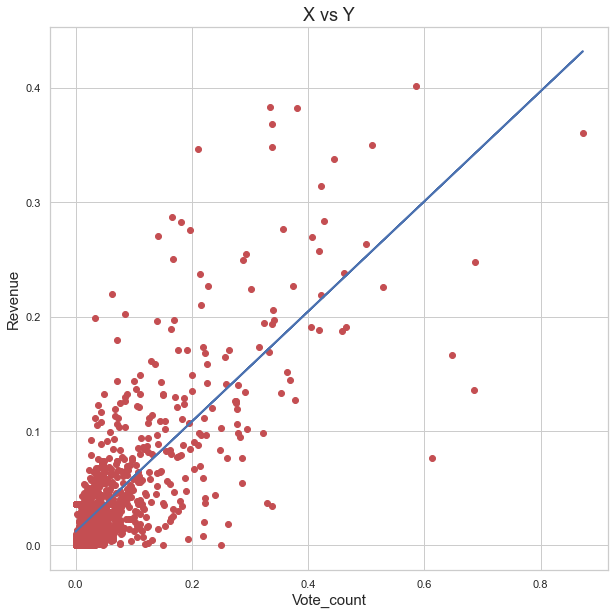

In [544]:
fig, ax = plt.subplots(figsize = (10,10))
ax.set_xlabel('Vote_count', fontsize=15)
ax.set_ylabel('Revenue', fontsize=15)
ax.set_title('X vs Y', fontsize=18)
plt.scatter(x = X_test, y = y_test , color = 'r')
plt.plot(X_test, y_pred, color="b", linewidth=2)
plt.show()

In [557]:
#Model2 : 2 variables- [vote_count, budget]
y = data_reg_scaled['revenue'].values.reshape(-1,1)
X = data_reg_scaled[['vote_count','budget']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=20)
print("Shape of new dataframes - {} , {}".format(X_train.shape, X_test.shape))
reg_model = LinearRegression().fit(X_train, y_train)
y_pred = reg_model.predict(X_test)
#R2 score
print('Linear Regression Model Errors with 2 variable')
#linear_r2 = round(reg_model.score(X_train,y_train),3)
print("R-Squared on train dataset={:.2f}".format(reg_model.score(X_train,y_train)))
print("R-Squared on test dataset={:.2f}".format(reg_model.score(X_test,y_test)))

linear_R2_score_train=reg_model.score(X_train,y_train)
linear_R2_score_test=reg_model.score(X_test,y_test)

#MSE,MAE,RMSE
linear_MSE=round(mean_squared_error(y_test, y_pred),3)
linear_MAE=round(mean_absolute_error(y_test,y_pred),3)
linear_RMSE =round( mean_squared_error(y_test, y_pred, squared=False),3)


print('Mean Squared Error=',linear_MSE,'\n','Mean Absolute error=',linear_MAE,'\n','Root Mean Squared Error=',linear_RMSE)

Shape of new dataframes - (2731, 2) , (1171, 2)
Linear Regression Model Errors with 2 variable
R-Squared on train dataset=0.66
R-Squared on test dataset=0.66
Mean Squared Error= 0.001 
 Mean Absolute error= 0.022 
 Root Mean Squared Error= 0.033


In [546]:
#Model3 : 3 variables['vote_count','budget','popularity']
y = data_reg_scaled['revenue'].values.reshape(-1,1)
X = data_reg_scaled[['vote_count','budget','popularity']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=20)
print("Shape of new dataframes - {} , {}".format(X_train.shape, X_test.shape))
reg_model = LinearRegression().fit(X_train, y_train)
y_pred = reg_model.predict(X_test)
#R2 score
print('Linear Regression Model Errors with 3 variable')
#linear_r2 = round(reg_model.score(X_train,y_train),3)
print("R-Squared on train dataset={:.2f}".format(reg_model.score(X_train,y_train)))
print("R-Squared on test dataset={:.2f}".format(reg_model.score(X_test,y_test)))

linear_R2_score_train=reg_model.score(X_train,y_train)
linear_R2_score_test=reg_model.score(X_test,y_test)

#MSE,MAE,RMSE
linear_MSE=round(mean_squared_error(y_test, y_pred),3)
linear_MAE=round(mean_absolute_error(y_test,y_pred),3)
linear_RMSE =round( mean_squared_error(y_test, y_pred, squared=False),3)


print('Mean Squared Error=',linear_MSE,'\n','Mean Absolute error=',linear_MAE,'\n','Root Mean Squared Error=',linear_RMSE)

Shape of new dataframes - (2731, 3) , (1171, 3)
Linear Regression Model Errors with 3 variable
R-Squared on train dataset=0.66
R-Squared on test dataset=0.66
Mean Squared Error= 0.001 
 Mean Absolute error= 0.022 
 Root Mean Squared Error= 0.033


#Since budget and popularity have corrleation of 0.452, the results have no significant change in errors

In [552]:
#Model 4 : 3 varibles 'vote_count','budget','runtime'
y = data_reg_scaled['revenue'].values.reshape(-1,1)
X = data_reg_scaled[['vote_count','budget','runtime']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=20)
print("Shape of new dataframes - {} , {}".format(X_train.shape, X_test.shape))
reg_model = LinearRegression().fit(X_train, y_train)
y_pred = reg_model.predict(X_test)
#R2 score
print('Linear Regression Model Errors with 3 variable')
#linear_r2 = round(reg_model.score(X_train,y_train),3)
print("R-Squared on train dataset={:.2f}".format(reg_model.score(X_train,y_train)))
print("R-Squared on test dataset={:.2f}".format(reg_model.score(X_test,y_test)))

linear_R2_score_train=reg_model.score(X_train,y_train)
linear_R2_score_test=reg_model.score(X_test,y_test)

#MSE,MAE,RMSE
linear_MSE=round(mean_squared_error(y_test, y_pred),3)
linear_MAE=round(mean_absolute_error(y_test,y_pred),3)
linear_RMSE =round( mean_squared_error(y_test, y_pred, squared=False),3)


print('Mean Squared Error=',linear_MSE,'\n','Mean Absolute error=',linear_MAE,'\n','Root Mean Squared Error=',linear_RMSE)

Shape of new dataframes - (2731, 3) , (1171, 3)
Linear Regression Model Errors with 3 variable
R-Squared on train dataset=0.66
R-Squared on test dataset=0.66
Mean Squared Error= 0.001 
 Mean Absolute error= 0.022 
 Root Mean Squared Error= 0.033


In [553]:
#Model5 #considering all variables
y = data_reg_scaled['revenue']
X = data_reg_scaled[feat_reg]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=20)
#print("Shape of new dataframes - {} , {}".format(X_train.shape, X_test.shape))
reg_model = LinearRegression().fit(X_train, y_train)
y_pred = reg_model.predict(X_test)

In [554]:

print('Intercept:', reg_model.intercept_)
print('Slope:', reg_model.coef_)

Intercept: 0.005801711587976301
Slope: [ 0.32565203  0.22488898  0.07595142 -0.00669463 -0.01929183  0.01045622
  0.00350954]


In [555]:
#R2 score
print('Linear Regression Model Errors')
#linear_r2 = round(reg_model.score(X_train,y_train),3)
print("R-Squared on train dataset={:.2f}".format(reg_model.score(X_train,y_train)))
print("R-Squared on test dataset={:.2f}".format(reg_model.score(X_test,y_test)))

linear_R2_score_train=reg_model.score(X_train,y_train)
linear_R2_score_test=reg_model.score(X_test,y_test)

#MSE,MAE,RMSE
linear_MSE=round(mean_squared_error(y_test, y_pred),3)
linear_MAE=round(mean_absolute_error(y_test,y_pred),3)
linear_RMSE =round( mean_squared_error(y_test, y_pred, squared=False),3)


print('Mean Squared Error=',linear_MSE,'\n','Mean Absolute error=',linear_MAE,'\n','Root Mean Squared Error=',linear_RMSE)

Linear Regression Model Errors
R-Squared on train dataset=0.67
R-Squared on test dataset=0.66
Mean Squared Error= 0.001 
 Mean Absolute error= 0.022 
 Root Mean Squared Error= 0.033


# Comparing all 5 models of linear regression, the model 2 performs better with the independent variables- vote_count,budget

#Random Forest Regressor

In [550]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(max_depth=10)
rfr.fit(X_train, y_train)
y_pred_rfr=rfr.predict(X_test)

In [551]:
print('Random Forest Regressor Model Errors')

print("R-Squared on train dataset={:.2f}".format(rfr.score(X_train,y_train)))
print("R-Squared on test dataset={:.2f}".format(rfr.score(X_test,y_test)))
rfr_score_train=rfr.score(X_train,y_train)
rfr_score_test=rfr.score(X_test,y_test)
#MSE,MAE,RMSE
rfr_MSE=round(mean_squared_error(y_test, y_pred_rfr),3)
rfr_MAE=round(mean_absolute_error(y_test,y_pred_rfr),3)
rfr_RMSE =round( mean_squared_error(y_test, y_pred_rfr, squared=False),3)


print('Mean Squared Error=',rfr_MSE,'\n','Mean Absolute error=',rfr_MAE,'\n','Root Mean Squared Error=',rfr_RMSE)

Random Forest Regressor Model Errors
R-Squared on train dataset=0.92
R-Squared on test dataset=0.70
Mean Squared Error= 0.001 
 Mean Absolute error= 0.02 
 Root Mean Squared Error= 0.031


Among Linear Regression and Random forest regressor, Random forest regressor has a good model fit with R value 0.92